<a href="https://colab.research.google.com/github/HoangHungLN/MachineLearning_Assignment/blob/main/Assignment3/notebooks/Assignment3_CEML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/HoangHungLN/MachineLearning_Assignment.git
!cd MachineLearning_Assignment && git lfs pull

fatal: destination path 'MachineLearning_Assignment' already exists and is not an empty directory.


üîπ S·ªë l∆∞·ª£ng m·∫´u: 12600
üîπ S·ªë l∆∞·ª£ng l·ªõp: 15
üîπ Danh s√°ch l·ªõp: ['sitting' 'using_laptop' 'hugging' 'sleeping' 'drinking' 'clapping'
 'dancing' 'cycling' 'calling' 'laughing' 'eating' 'fighting'
 'listening_to_music' 'running' 'texting']


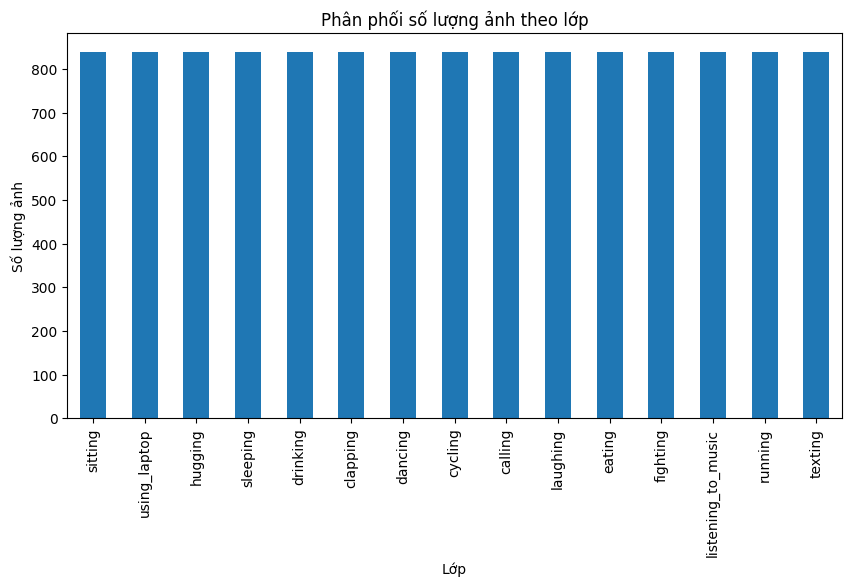

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 200/200 [00:00<00:00, 1935.86it/s]



üìè Th·ªëng k√™ k√≠ch th∆∞·ªõc ·∫£nh:
            width      height  channels
count  200.000000  200.000000     200.0
mean   256.510000  196.805000       3.0
std     46.817189   37.800281       0.0
min     84.000000   84.000000       3.0
25%    248.750000  179.000000       3.0
50%    275.000000  183.000000       3.0
75%    276.000000  194.500000       3.0
max    385.000000  300.000000       3.0

üé® S·ªë k√™nh m√†u th∆∞·ªùng g·∫∑p:
channels
3    200
Name: count, dtype: int64


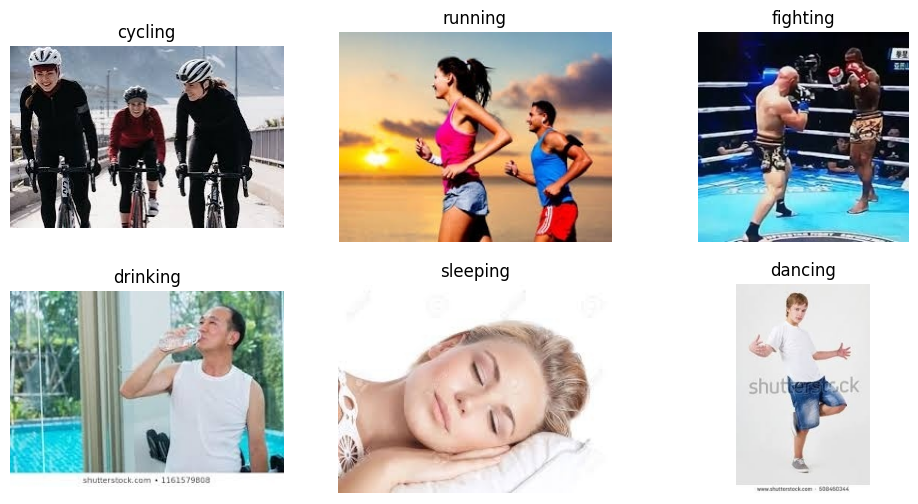

In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tqdm import tqdm

# --- ƒê∆∞·ªùng d·∫´n ---
base_dir = "MachineLearning_Assignment/Assignment3/data"
csv_path = os.path.join(base_dir, "Training_set.csv")
image_dir = os.path.join(base_dir, "HumanActionDataset")

# --- ƒê·ªçc file CSV ---
df = pd.read_csv(csv_path)
print("üîπ S·ªë l∆∞·ª£ng m·∫´u:", len(df))
print("üîπ S·ªë l∆∞·ª£ng l·ªõp:", df['label'].nunique())
print("üîπ Danh s√°ch l·ªõp:", df['label'].unique())

# --- Ph√¢n ph·ªëi nh√£n ---
plt.figure(figsize=(10,5))
df['label'].value_counts().plot(kind='bar')
plt.title("Ph√¢n ph·ªëi s·ªë l∆∞·ª£ng ·∫£nh theo l·ªõp")
plt.xlabel("L·ªõp")
plt.ylabel("S·ªë l∆∞·ª£ng ·∫£nh")
plt.show()

# --- Th·ªëng k√™ k√≠ch th∆∞·ªõc ·∫£nh ---
widths, heights, channels = [], [], []

for fname in tqdm(df['filename'][:200]):  # ch·ªâ duy·ªát 200 ·∫£nh ƒë·∫ßu cho nhanh
    fpath = os.path.join(image_dir, fname)
    if os.path.exists(fpath):
        with Image.open(fpath) as img:
            w, h = img.size
            c = len(img.getbands())
            widths.append(w)
            heights.append(h)
            channels.append(c)

stats_df = pd.DataFrame({
    "width": widths,
    "height": heights,
    "channels": channels
})

print("\nüìè Th·ªëng k√™ k√≠ch th∆∞·ªõc ·∫£nh:")
print(stats_df.describe())

print("\nüé® S·ªë k√™nh m√†u th∆∞·ªùng g·∫∑p:")
print(stats_df['channels'].value_counts())

# --- Hi·ªÉn th·ªã v√†i ·∫£nh m·∫´u ---
sample_imgs = df.sample(6, random_state=42)
plt.figure(figsize=(12, 6))
for i, row in enumerate(sample_imgs.itertuples()):
    img_path = os.path.join(image_dir, row.filename)
    img = Image.open(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(row.label)
    plt.axis("off")
plt.show()
